<h1>SMOTE</h1>

synthetic Minorityy Oversampling Technique

Smote involves generating synthetic instances of the minority class by interpolating between existing instances.

In [37]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [25]:
X,y = make_classification(
    random_state=42, 
    n_samples = 1000, 
    n_features=2,
    n_redundant=0,
    )

Way 1: count unique values in numpy

In [33]:
# count y values of how many of each class
values, count = np.unique(y, return_counts=True)
a = zip(values, count)
dict(a)

{np.int64(0): np.int64(498), np.int64(1): np.int64(502)}

Way 2: count unique values using numpy and python

In [34]:
import collections
counter = collections.Counter(y)
counter

Counter({np.int64(1): 502, np.int64(0): 498})

But we need to make an imbalance dataset

In [35]:
X,y = make_classification(
    random_state=42, 
    n_samples = 1000, 
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.9, 0.1]  # Adjust weights to create imbalance
    )

In [36]:
values, count = np.unique(y, return_counts=True)
a = zip(values, count)
dict(a)

{np.int64(0): np.int64(895), np.int64(1): np.int64(105)}

Creating dataframe form those values

In [38]:
df1 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df1['target'] = y
df1

,feature1,feature2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
995,1.713939,0.451639,1
996,1.509473,-0.794996,0
997,-2.150901,-2.989372,0
998,2.451647,-0.156629,0


plotting the dataframe using matplotlib

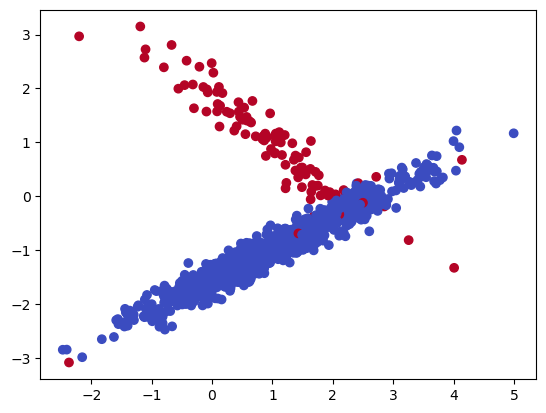

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')

Plotting using pandas

Text(0.5, 1.0, 'Scatter plot of features with target classes')

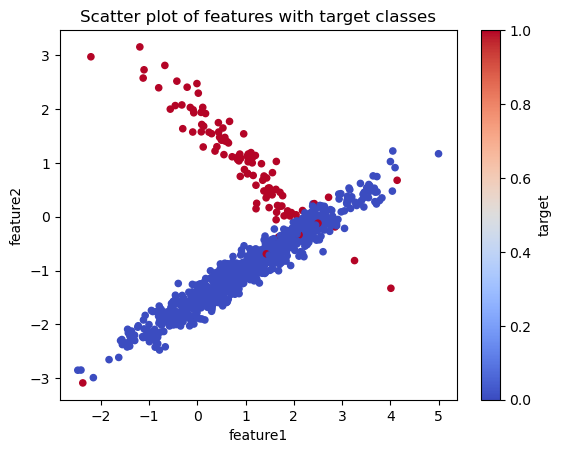

In [42]:
df1.plot.scatter(x='feature1', y='feature2', c='target', cmap='coolwarm')
plt.title('Scatter plot of features with target classes')

Text(0.5, 1.0, 'Count of target classes')

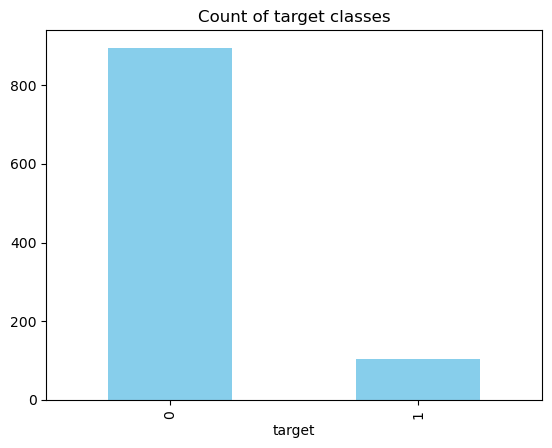

In [45]:
df1.target.value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of target classes')

In [49]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
df1.columns

Index(['feature1', 'feature2', 'target'], dtype='object')

In [52]:
oversampler = SMOTE(random_state=42)
X,y = oversampler.fit_resample(df1[['feature1', 'feature2']], df1['target'])

In [53]:
X.shape, y.shape

((1790, 2), (1790,))

<Axes: xlabel='target', ylabel='count'>

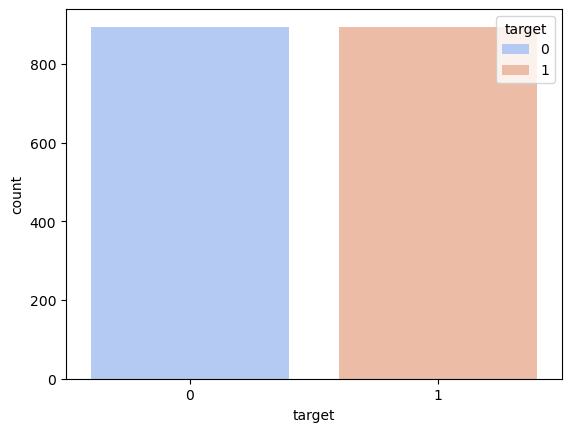

In [65]:
y.value_counts().reset_index()
import seaborn as sns
sns.barplot(
    x='target', 
    y='count', 
    data=y.value_counts().reset_index(), 
    hue='target',
    palette='coolwarm'
)

Now we have similar count

In [69]:
df2 = pd.DataFrame(X, columns=['feature1', 'feature2'])
df2['target'] = y
df2

,feature1,feature2,target
0,1.073546,-1.101339,0
1,0.755945,-1.172352,0
2,1.354479,-0.948528,0
3,3.103090,0.233485,0
4,1.951888,-0.270157,0
...,...,...,...
1785,-0.887867,2.567409,1
1786,1.333479,0.259539,1
1787,2.401345,-0.181753,1
1788,1.494385,0.491328,1


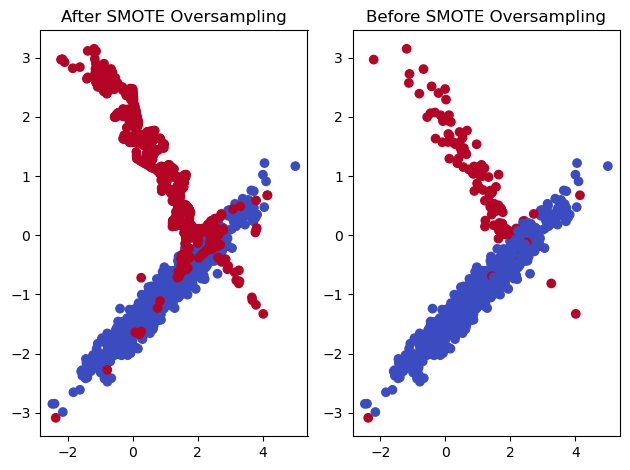

In [74]:
plt.subplot(1,2,1)
plt.scatter(df2['feature1'], df2['feature2'],c=df2['target'], cmap='coolwarm')
plt.title('After SMOTE Oversampling')

plt.subplot(1,2,2)
plt.scatter(df1['feature1'], df1['feature2'],c=df1['target'], cmap='coolwarm')
plt.title('Before SMOTE Oversampling')
plt.tight_layout()